In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from keras.callbacks import EarlyStopping
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [3]:
#download the dataset file from google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
#File id from google drive file shareable link
id = "#####"

In [5]:
#download the file and get the content
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('breastCancerDataset.csv')  
dataset = pd.read_csv('breastCancerDataset.csv')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
dataset = dataset.drop(columns=['Unnamed: 32'])

In [8]:
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
#Check the percentage of null values
dataset.isnull().sum()/len(dataset)*100

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

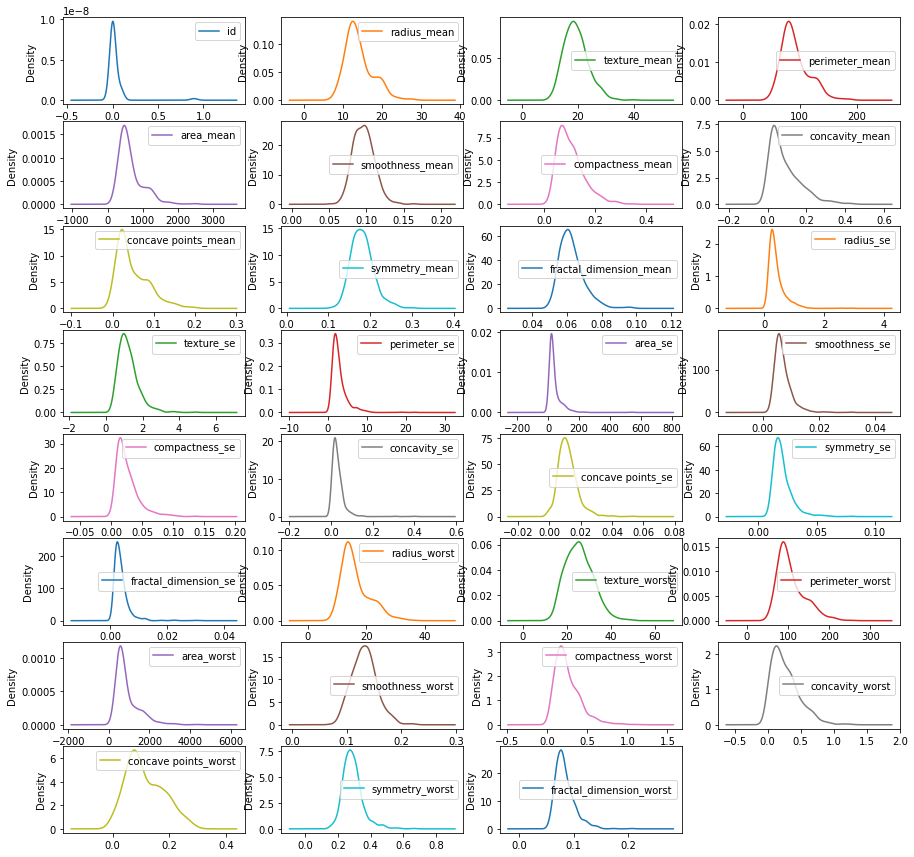

In [10]:
#Density plots to understand the distribution of each attribute
dataset.plot(figsize=(15,15),kind='density', subplots=True, layout=(8,4), sharex=False,)
plt.show()

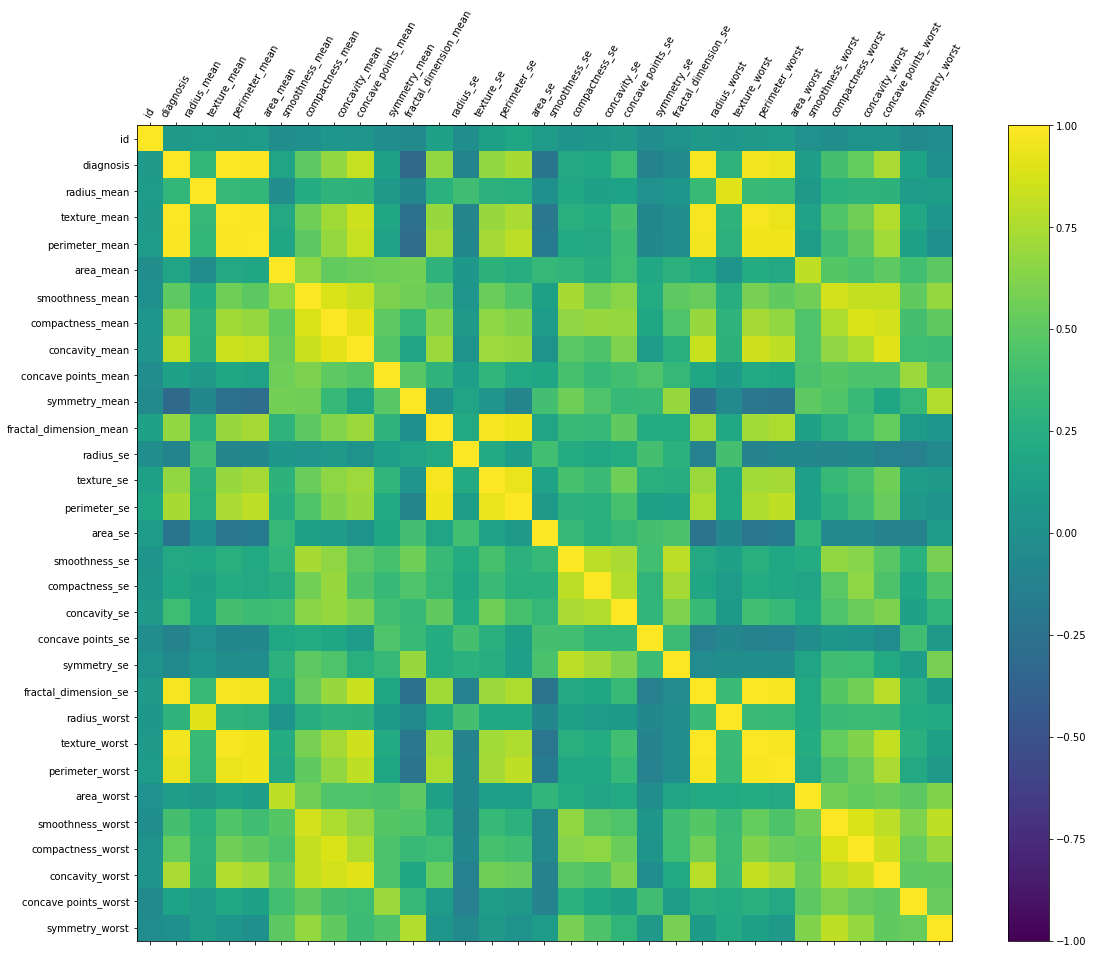

In [11]:
#Correlation matrix between the attributes
correlations = dataset.corr()
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,31,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataset.columns)
ax.set_yticklabels(dataset.columns)
plt.xticks(rotation=60)
plt.show()

In [12]:
#Scale the data and separate feature & labels
x = StandardScaler().fit_transform(dataset.drop(columns=['id','diagnosis']).values)
y = dataset['diagnosis'].values

In [13]:
#Study variance by 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(x)
pca_df = pd.DataFrame(data = pca_result
             , columns = ['principal component 1', 'principal component 2'])
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


<Figure size 432x288 with 0 Axes>

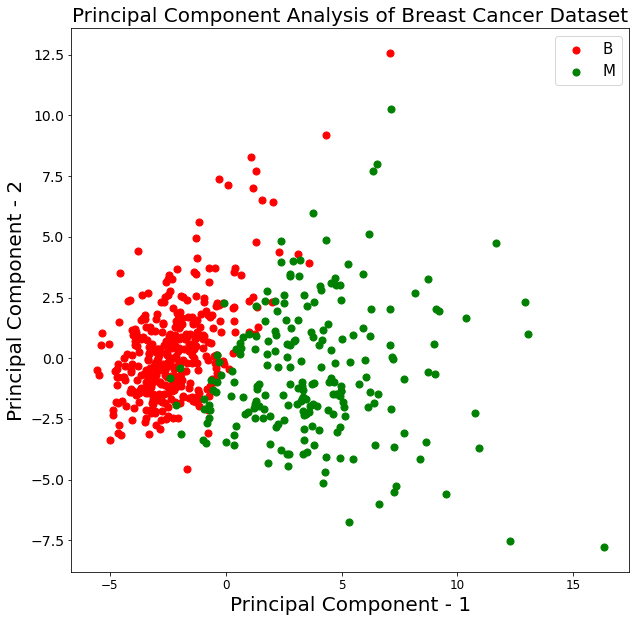

In [14]:
#plot of PCA
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['B', 'M']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = dataset['diagnosis'] == target
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1']
               , pca_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [15]:
#split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [16]:
#Fit the data using K nearest neighbour
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_train_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)
print("KNN training accuracy : {:.2f}%".format(metrics.accuracy_score(y_train_pred,y_train)*100))
print("KNN test accuracy : {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

KNN training accuracy : 97.80%
KNN test accuracy : 97.37%


In [17]:
#Fit the data using logistic regression
reg = LogisticRegression()
reg.fit(X_train,y_train)
print("Logistic Regression accuracy : {:.2f}%".format(reg.score(X_train,y_train)*100))
print("Logistic Regression accuracy : {:.2f}%".format(reg.score(X_test,y_test)*100))

Logistic Regression accuracy : 98.68%
Logistic Regression accuracy : 99.12%


In [18]:
#Fit the data using SVM
svm = SVC(gamma='auto',kernel='linear',C=0.05)
svm.fit(X_train,y_train)
print("SVC training accuracy : {:.2f}%".format(svm.score(X_train,y_train)*100))
print("SVC test accuracy : {:.2f}%".format(svm.score(X_test,y_test)*100))

SVC training accuracy : 98.02%
SVC test accuracy : 98.25%


In [19]:
#Fit the data using MLP
#Earlystopping to avoid overfitting - training size is small
mlp = MLPClassifier(alpha=1e-5,hidden_layer_sizes=(16,8,2), random_state=1,activation='relu',early_stopping=True)
mlp.fit(X_train, y_train)
print("MLP train accuracy : {:.2f}%".format(mlp.score(X_train,y_train)*100))
print("MLP test ccuracy : {:.2f}%".format(mlp.score(X_test,y_test)*100))

MLP train accuracy : 81.98%
MLP test ccuracy : 81.58%


In [23]:
#SVM with K fold
def predict(X,y):
  prediction = clf.predict(X)
  test_length = len(y)
  count=0
  for i in range(0,test_length):
    if prediction[i] == y[i]:
      count=count+1
  return ((count/len(y))*100)

clf = SVC(gamma='auto',kernel='linear',C=0.05)
kf = KFold(n_splits=4)
train_predict = 0
test_predict = 0
i=0
for train_index,test_index in kf.split(X_train):
  x_train, x_test, Y_train, Y_test = X_train[train_index], X_train[test_index], y_train[train_index], y_train[test_index]
  clf.fit(x_train,Y_train)
  train_predict = train_predict + predict(x_train,Y_train)
  test_predict = test_predict + predict(x_test,Y_test)
  i=i+1
print("Training accuracy : {:.2f}%".format(train_predict/i))
print("Test accuracy : {:.2f}%".format(predict(X_test,y_test)))

Training accuracy : 98.10%
Test accuracy : 98.25%


In [24]:
#One hot encoding
label_encoder = LabelEncoder()
vec1 = label_encoder.fit_transform(y_train)
y_train = to_categorical(vec1)
vec2 = label_encoder.fit_transform(y_test)
y_test = to_categorical(vec2)
print(y_train.shape,y_test.shape)

#Intialization
batch_size = 128
num_classes = 2
epochs = 20

#Model definition
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(30,)))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

(455, 2) (114, 2)


In [25]:
es_callback = EarlyStopping(monitor='val_loss', patience=3)
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2,callbacks=[es_callback])

Train on 364 samples, validate on 91 samples
Epoch 1/20
364/364 [==============================] - 1s 2ms/step - loss: 0.4139 - accuracy: 0.8242 - val_loss: 0.0833 - val_accuracy: 0.9780
Epoch 2/20
364/364 [==============================] - 0s 535us/step - loss: 0.1147 - accuracy: 0.9615 - val_loss: 0.0816 - val_accuracy: 0.9780
Epoch 3/20
364/364 [==============================] - 0s 475us/step - loss: 0.1146 - accuracy: 0.9670 - val_loss: 0.0830 - val_accuracy: 0.9780
Epoch 4/20
364/364 [==============================] - 0s 502us/step - loss: 0.0883 - accuracy: 0.9753 - val_loss: 0.0766 - val_accuracy: 0.9780
Epoch 5/20
364/364 [==============================] - 0s 500us/step - loss: 0.0587 - accuracy: 0.9780 - val_loss: 0.0750 - val_accuracy: 0.9780
Epoch 6/20
364/364 [==============================] - 0s 501us/step - loss: 0.0373 - accuracy: 0.9863 - val_loss: 0.0675 - val_accuracy: 0.9780
Epoch 7/20
364/364 [==============================] - 0s 498us/step - loss: 0.0252 - accuracy

In [27]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print("Training accuracy : {:.2f}%".format(np.mean(history.history['accuracy'])*100))
print("Validation accuracy : {:.2f}%".format(np.mean(history.history['val_accuracy'])*100))
print("Test accuracy : {:.2f}%".format(metrics.accuracy_score(y_pred,y_test)*100))

Training accuracy : 96.37%
Validation accuracy : 97.80%
Test accuracy : 98.25%
